# システム信頼性の評価


このノートブックでは、システム信頼性の評価において一般的に用いられる「バスタブ曲線」について説明します。
バスタブ曲線は、製品やシステムのライフサイクルにおける故障率を表すグラフです。この曲線は、以下の3つの主要なフェーズから成り立っています。

1. **DFR（Decreasing Failure Rate：減少故障率）** - 初期故障期または乳児死亡期。この期間では、製品は初期不良や製造上の問題により高い故障率を示すことが多いです。時間が経つにつれて、故障率は減少します。

2. **CFR（Constant Failure Rate：一定故障率）** - 偶発故障期。この期間では、故障率は一定となります。製品は設計通りの性能を発揮し、ランダムな故障が発生する可能性があります。

3. **IFR（Increasing Failure Rate：増加故障率）** - 摩耗故障期または疲労故障期。この期間では、製品の寿命が近づくにつれて故障率が増加します。

これらのフェーズを組み合わせることで、バスタブ曲線が形成されます。


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


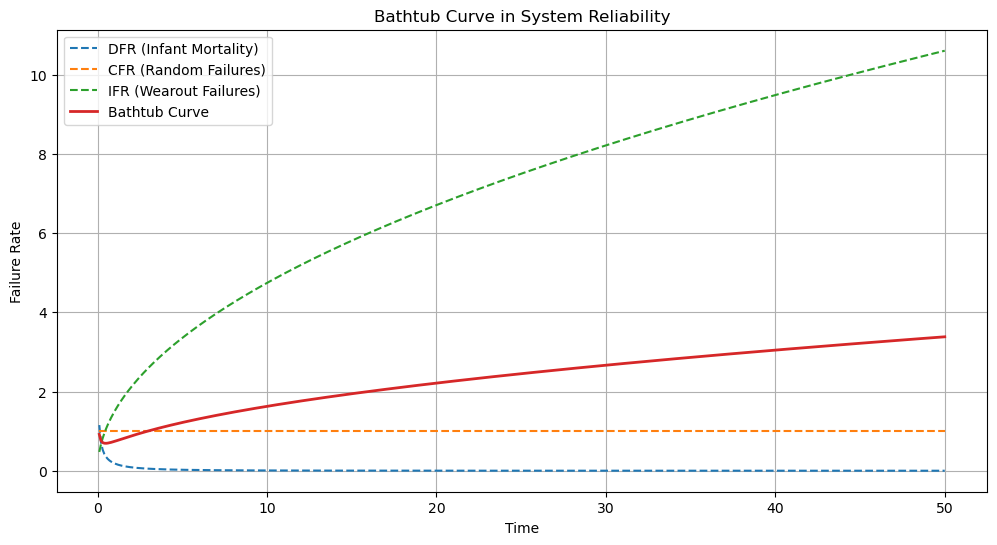

In [1]:

import matplotlib.pyplot as plt
import numpy as np

# Time variable
t = np.linspace(0.1, 50, 500)

# Parameters for Weibull distribution
eta = 1.0  # Scale parameter
beta_decreasing = 0.5  # Shape parameter for Decreasing Failure Rate (DFR)
beta_constant = 1.0  # Shape parameter for Constant Failure Rate (CFR)
beta_increasing = 1.5  # Shape parameter for Increasing Failure Rate (IFR)

# Failure rate functions
lambda_dfr = (beta_decreasing / eta) * (t / eta)**(beta_decreasing - 1) * np.exp(-((t / eta)**beta_decreasing))
lambda_cfr = np.full(t.shape, 1 / eta)  # Constant value
lambda_ifr = (beta_increasing / eta) * (t / eta)**(beta_increasing - 1)

# Combine these to form the "bathtub" curve
weights = [0.5, 0.2, 0.3]
lambda_bathtub = weights[0]*lambda_dfr + weights[1]*lambda_cfr + weights[2]*lambda_ifr

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, lambda_dfr, label='DFR (Infant Mortality)', linestyle='--')
plt.plot(t, lambda_cfr, label='CFR (Random Failures)', linestyle='--')
plt.plot(t, lambda_ifr, label='IFR (Wearout Failures)', linestyle='--')
plt.plot(t, lambda_bathtub, label='Bathtub Curve', linewidth=2)

plt.title('Bathtub Curve in System Reliability')
plt.xlabel('Time')
plt.ylabel('Failure Rate')
plt.grid(True)
plt.legend()
plt.show()


# ワイブル分布の説明

m<1（例：m=0.5m=0.5）の場合、瞬間故障率は時間とともに減少します。これはバスタブ曲線の「初期故障期」に対応します。
m=1m=1の場合、瞬間故障率は一定です。これはバスタブ曲線の「偶発故障期」に対応します。
m>1m>1（例：m=1.5,2,3m=1.5,2,3）の場合、瞬間故障率は時間とともに増加します。これはバスタブ曲線の「摩耗故障期」に対応します。

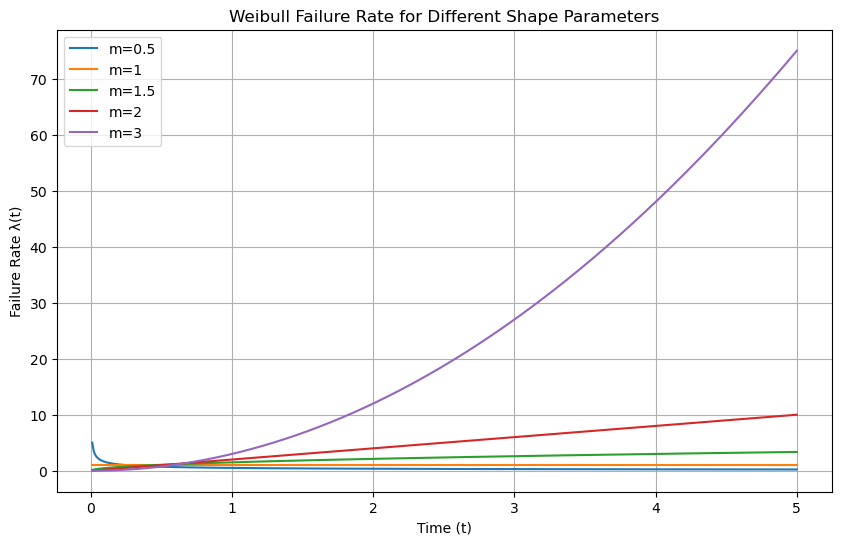

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the Weibull failure rate (hazard function)
def weibull_failure_rate(t, m, eta=1):
    return (m / eta) * ((t / eta) ** (m - 1))

# Time array
t = np.linspace(0.01, 5, 500)

# Different shape parameters (m)
shape_parameters = [0.5, 1, 1.5, 2, 3]

plt.figure(figsize=(10, 6))

# Plotting the Weibull failure rates for different shape parameters
for m in shape_parameters:
    plt.plot(t, weibull_failure_rate(t, m), label=f'm={m}')

plt.title('Weibull Failure Rate for Different Shape Parameters')
plt.xlabel('Time (t)')
plt.ylabel('Failure Rate λ(t)')
plt.legend()
plt.grid(True)
plt.show()


# もうちょっとQCっぽく表してみます

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Weibull distribution formula: (m / lambda) * (t / lambda)^(m-1) * e^-(t / lambda)^m
def weibull(m, lambda_, t):
    return (m / lambda_) * (t / lambda_)**(m - 1) * np.exp(- (t / lambda_)**m)

C:\Users\Manyan\anaconda3\envs\osac\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


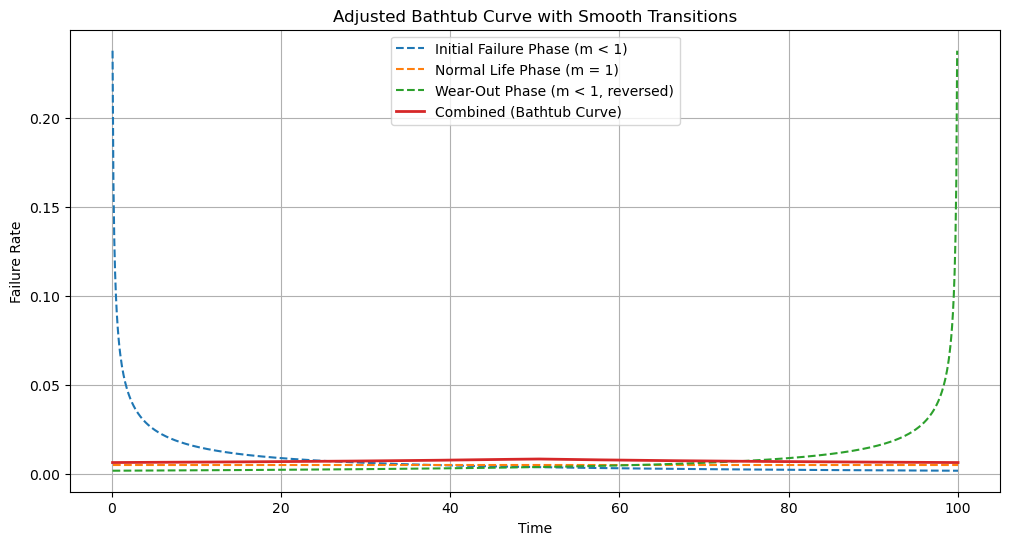

In [2]:
# Time range for plotting
time = np.linspace(0.1, 100, 1000)  # To avoid division by zero, starting from 0.1

# Defining the time where the normal life phase (m=1) is dominant, let's set it to 40
time_normal_dominant = 40

# Parameters for Weibull distribution for initial and wear-out phase
# Using m=0.5 for both to make them symmetric
m_initial_wearout = 0.5
lambda_initial_wearout = time_normal_dominant

# Calculating failure rates for initial and wear-out phase
failure_rate_initial = weibull(m_initial_wearout, lambda_initial_wearout, time)
failure_rate_wearout = weibull(m_initial_wearout, lambda_initial_wearout, 100 - time)  # Reversing time to make it symmetric

# Parameters for normal life phase (Exponential distribution)
# m=1 and lambda such that it matches with initial and wearout at time_normal_dominant
m_normal = 1.0
lambda_normal = weibull(m_initial_wearout, lambda_initial_wearout, time_normal_dominant)

# Calculating failure rate for normal phase
failure_rate_normal = np.full_like(time, lambda_normal)

# Combining the three phases smoothly
# Using minimum of initial and wearout rates as they are symmetric
failure_rate_combined = np.minimum(failure_rate_initial, failure_rate_wearout) + failure_rate_normal

# Plotting the failure rates
plt.figure(figsize=(12, 6))
plt.plot(time, failure_rate_initial, label='Initial Failure Phase (m < 1)', linestyle='--')
plt.plot(time, failure_rate_normal, label='Normal Life Phase (m = 1)', linestyle='--')
plt.plot(time, failure_rate_wearout, label='Wear-Out Phase (m < 1, reversed)', linestyle='--')
plt.plot(time, failure_rate_combined, label='Combined (Bathtub Curve)', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Failure Rate')
plt.title('Adjusted Bathtub Curve with Smooth Transitions')
plt.legend()
plt.grid(True)
plt.show()